In [1]:
import torch

# Tensors

In [87]:
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float)
y = torch.tensor([[5, 6], [7, 8]], dtype=torch.float)

Float32 is the fastest. For more expensive cards, Float64 is faster.

Some linear algebra operations cannot be done on integers.

In [ ]:
x.long()

In [ ]:
x.to(y.dtype)

## Tensors vs numpy arrays

Tensors are must faster than numpy arrays because the former can live both on GPU and on CPU, and also are parallelised on CPU.

Tensors also support auto differentiation.

## Tensor operations

### Elementwise operations

Highly parallelised because the same operation is done on every element.

In [88]:
x+y

tensor([[ 6.,  8.],
        [10., 12.]])

In [89]:
x*y #element-wise multiplication

tensor([[ 5., 12.],
        [21., 32.]])

In [90]:
x.abs()

tensor([[1., 2.],
        [3., 4.]])

In [91]:
x.pow(3)

tensor([[ 1.,  8.],
        [27., 64.]])

### Inplace vs copy

Operations ending in an underscore are inplace. All other operations return a new copy.

In [92]:
x.mul(2)

tensor([[2., 4.],
        [6., 8.]])

In [93]:
x.mul_(2)

tensor([[2., 4.],
        [6., 8.]])

### Reduction operations

They need dimensions to be specified using dims=n, much like axis=n in pandas.

In [94]:
x.max(dim=0)

torch.return_types.max(
values=tensor([6., 8.]),
indices=tensor([1, 1]))

In [95]:
x.sort(dim=1)

torch.return_types.sort(
values=tensor([[2., 4.],
        [6., 8.]]),
indices=tensor([[0, 1],
        [0, 1]]))

They return both the values and the indiced of these values.

### Linear algebra

In [96]:
torch.mm(x, y)

tensor([[ 38.,  44.],
        [ 86., 100.]])

In [97]:
torch.inverse(y)

tensor([[-4.0000,  3.0000],
        [ 3.5000, -2.5000]])

In [98]:
torch.eig(x)

torch.return_types.eig(
eigenvalues=tensor([[-0.7446,  0.0000],
        [10.7446,  0.0000]]),
eigenvectors=tensor([]))

## Multiple dimensions

In [99]:
a = torch.tensor([x.tolist(), y.tolist()])
a

tensor([[[2., 4.],
         [6., 8.]],

        [[5., 6.],
         [7., 8.]]])

Slicing is done by a[min:max:stride, min:max:stride, min:max:stride]

In [100]:
a[0:2:1, 1:2:2, 1:2:1]
 #dim 1, dim 2, dim 3

tensor([[[8.]],

        [[8.]]])

Image data uses the following convention:

In [ ]:
data[batch_index, channel_index, y_position,   x_position]

   #index images, RGB channels,  row position, column position

Entries that vary only in the last dimensions are physically stored closer in the RAM because they are frequently combined together.

### Broadcasting

In [101]:
a[0] #zooms in on one dimension

tensor([[2., 4.],
        [6., 8.]])

In [102]:
a[None] #zooms out to add a new dimension

tensor([[[[2., 4.],
          [6., 8.]],

         [[5., 6.],
          [7., 8.]]]])

In [103]:
a[None].shape

torch.Size([1, 2, 2, 2])

---
---
---

# Devices

Tensors are stored on the CPU by default.

In [106]:
a = torch.eye(5, device='cpu')

In [ ]:
a = torch.eye(5, device='cuda')

In [107]:
#copying tensor to a different device
x.to(a.device)

tensor([[2., 4.],
        [6., 8.]])

In [109]:
x.cpu()

tensor([[2., 4.],
        [6., 8.]])

In [ ]:
x.cuda()

Changing the device to GPU can cause a very small change in the value of the tensor because GPU rounding is non-deterministic.

# Autograd

PyTorch can track the computational history of all tensors derived from a given tensors to figure out its derivative.

In [110]:
x.requires_grad=True

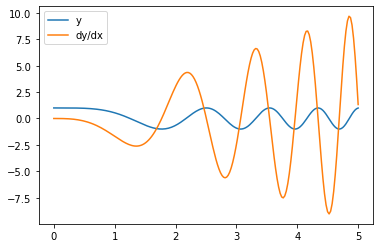

In [118]:
x = torch.linspace(0, 5, 200, requires_grad=True)
y = (x**2).cos()
dydx = torch.autograd.grad(y.sum(), [x])[0]

plt.plot(x.detach(), y.detach(), label='y') #.detach() is used to specify that you need an untracked reference
plt.plot(x.detach(), dydx, label='dy/dx')
plt.legend()
plt.show()